##### Bank Marketing

BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case:
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description:
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset:
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes: 
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign

Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")



In [252]:
df=pd.read_csv("Bank_Marketing_Train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [253]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [254]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [255]:
df.sample(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
24944,24288,59,technician,single,secondary,no,6284,yes,no,cellular,17,nov,41,1,-1,0,unknown,no
4742,10608,37,services,married,secondary,no,3321,no,no,unknown,16,jun,215,3,-1,0,unknown,no
15373,16574,50,technician,married,secondary,no,503,yes,no,cellular,24,jul,186,2,-1,0,unknown,no
2322,33383,50,management,divorced,tertiary,no,516,yes,yes,cellular,20,apr,198,1,-1,0,unknown,no
14330,43567,37,admin.,married,secondary,no,55,yes,yes,cellular,27,apr,99,1,329,4,other,no
23265,35825,42,admin.,married,secondary,no,3279,yes,no,cellular,8,may,261,1,344,1,failure,no
19461,33516,38,management,married,tertiary,no,7255,yes,no,cellular,20,apr,410,2,-1,0,unknown,no
5353,29445,32,services,married,secondary,no,414,yes,no,cellular,3,feb,236,2,272,1,failure,no
2109,22266,33,technician,single,tertiary,no,316,no,no,cellular,21,aug,126,3,-1,0,unknown,no
22246,13048,29,blue-collar,single,primary,no,170,yes,no,cellular,8,jul,216,1,-1,0,unknown,no


In [256]:
df.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [257]:
df.isnull().sum() # checking the null values in each column

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [258]:
df.isnull().sum().sum()

0

In [259]:
df.shape

(31647, 18)

In [260]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [262]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [263]:
# checking the duplicate values
df.duplicated().sum()

0

In [264]:
df.drop(["ID"],axis=1,inplace=True)

In [265]:
df.shape

(31647, 17)

In [266]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




In [267]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [268]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [269]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [270]:
# describe the dataset- give the satistical summary of numerical columns
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Observation:- Outliers is present in all numerical columns.
    positive skewness is present in mostly columns(mean> median)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'default'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>],
       [<Axes: title={'center': 'poutcome'}>,
        <Axes: title={'center': 'subscribed'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

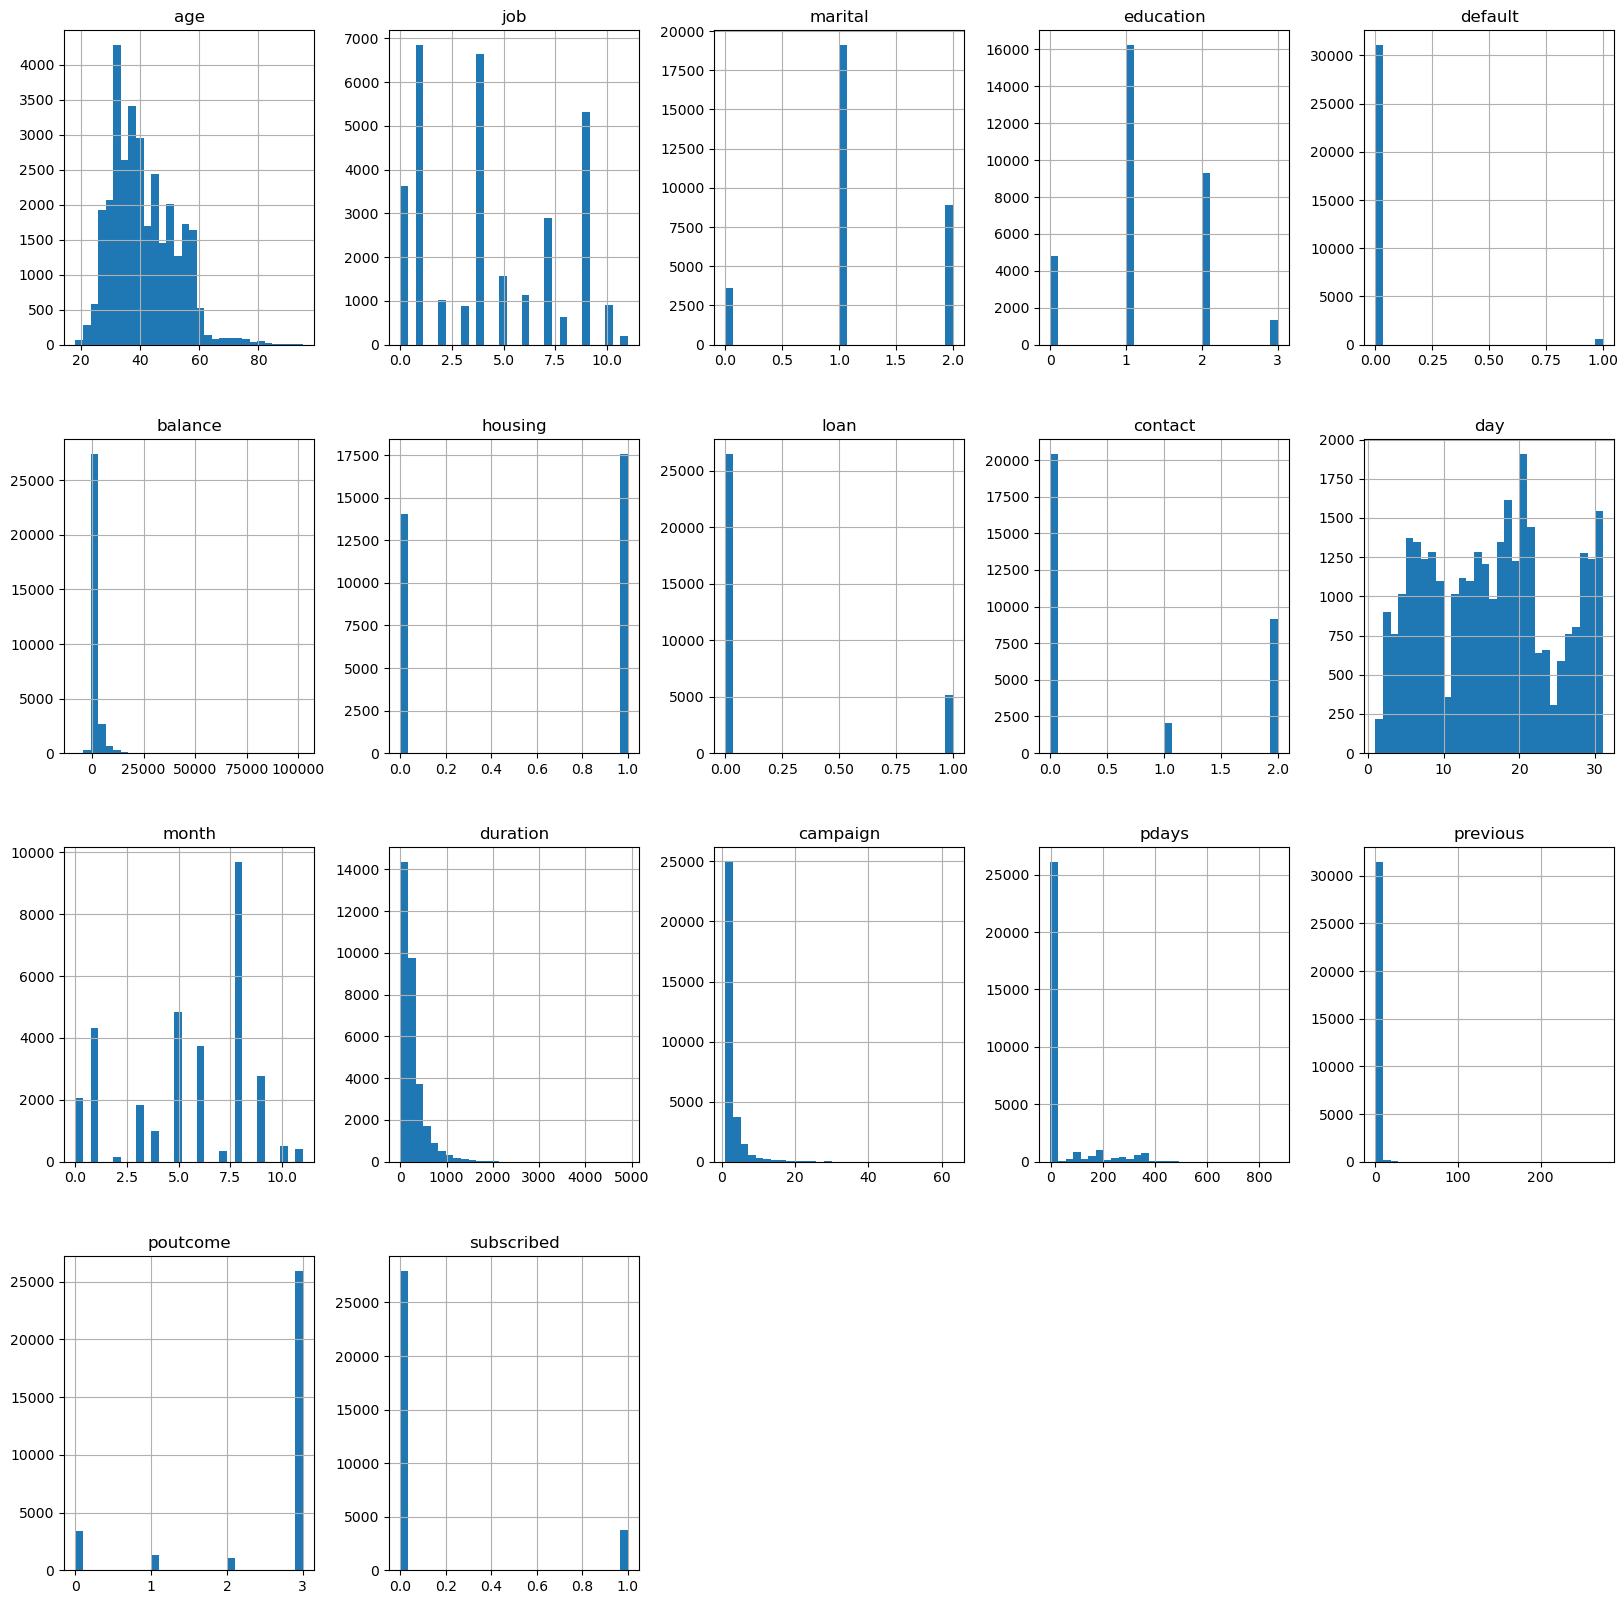

In [271]:
#Data Visualization
df.hist(figsize=(20,20),grid=True,layout=(4,5),bins=30)

<Axes: xlabel='subscribed', ylabel='age'>

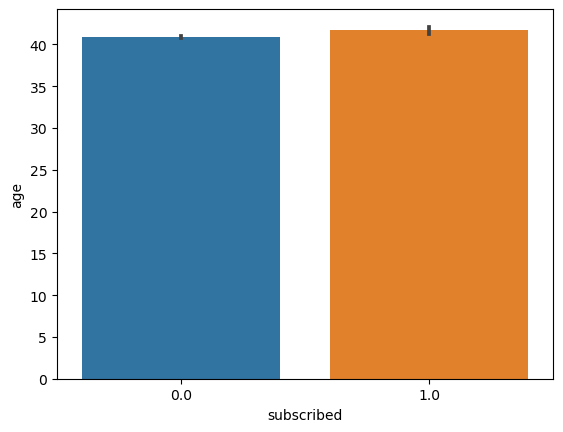

In [272]:
sns.barplot(x='subscribed',y='age',data=df)

Mostly 50+ age people subcribed compare than (>50 age people)

<Axes: xlabel='subscribed', ylabel='job'>

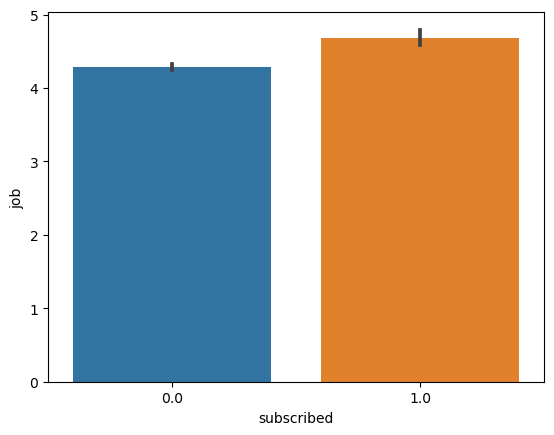

In [273]:
sns.barplot(x='subscribed',y='job',data=df)

<Axes: xlabel='subscribed', ylabel='balance'>

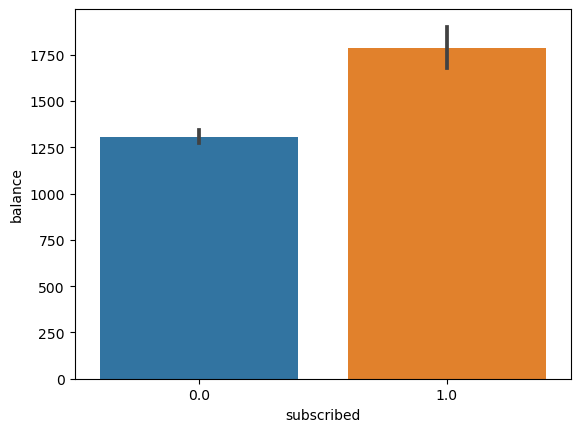

In [274]:
sns.barplot(x='subscribed',y='balance',data=df)

<Axes: xlabel='subscribed', ylabel='default'>

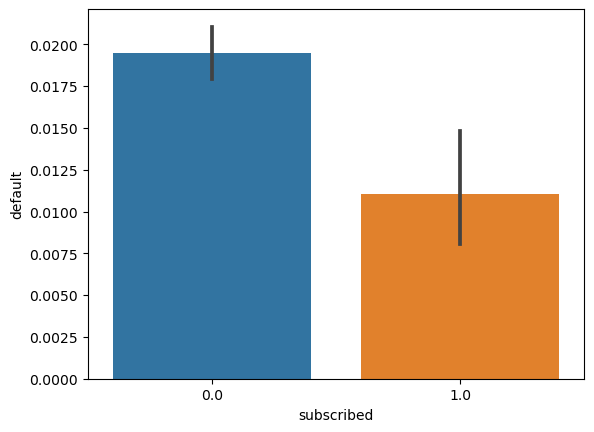

In [275]:
sns.barplot(x='subscribed',y='default',data=df)

<Axes: xlabel='subscribed', ylabel='marital'>

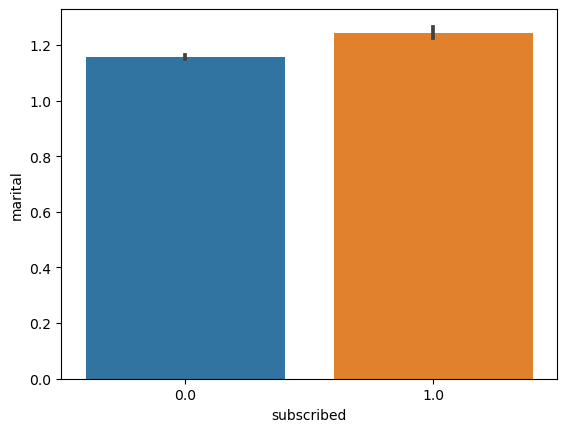

In [276]:
sns.barplot(x='subscribed',y='marital',data=df)

<Axes: xlabel='subscribed', ylabel='housing'>

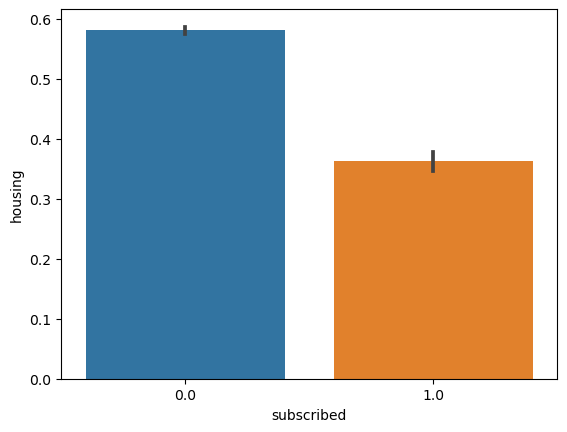

In [277]:
sns.barplot(x='subscribed',y='housing',data=df)

<Axes: xlabel='subscribed', ylabel='day'>

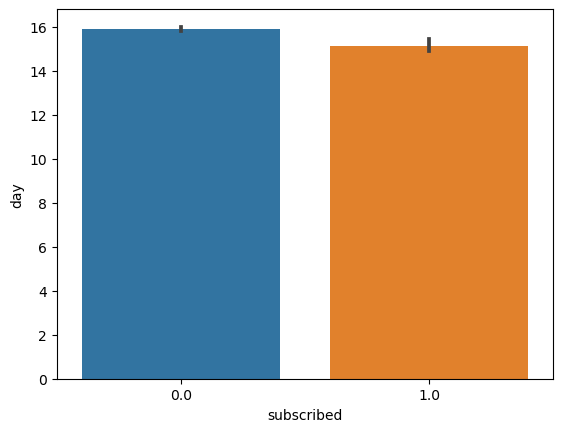

In [278]:
sns.barplot(x='subscribed',y='day',data=df)

<Axes: xlabel='subscribed', ylabel='duration'>

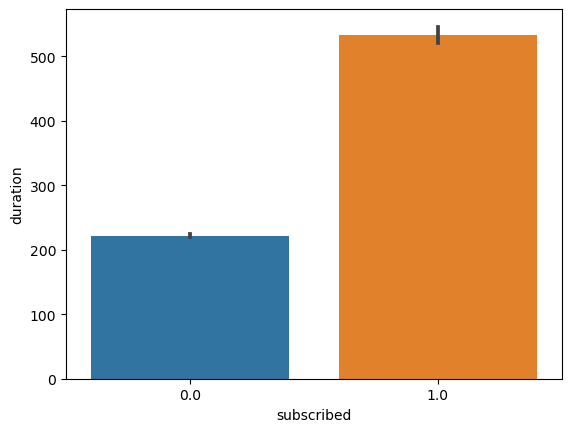

In [279]:
sns.barplot(x='subscribed',y='duration',data=df)

<Axes: xlabel='subscribed', ylabel='campaign'>

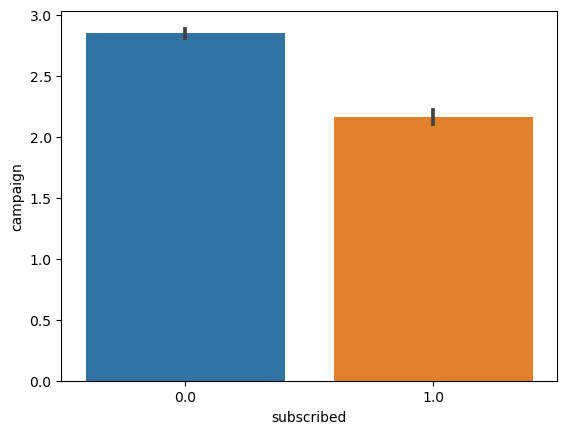

In [280]:
sns.barplot(x='subscribed',y='campaign',data=df)

<Axes: xlabel='subscribed', ylabel='pdays'>

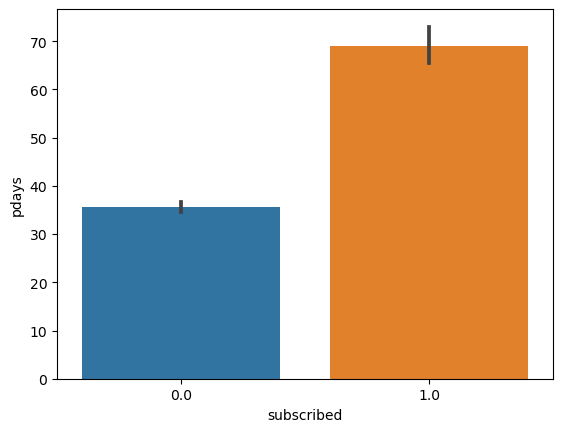

In [281]:
sns.barplot(x='subscribed',y='pdays',data=df)

<Axes: xlabel='subscribed', ylabel='previous'>

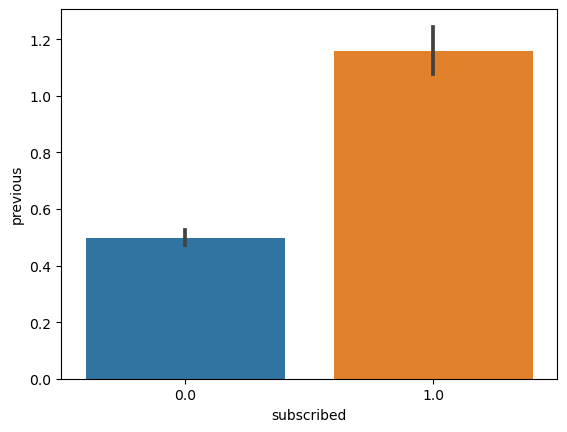

In [282]:
sns.barplot(x='subscribed',y='previous',data=df)

In [283]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


1. housing and contact w.r. t. label have highest negative correlation. 
2. pdays w.r.t poutcome has highest negative correlation 
3. pdays w.r.t. previous has highest positive correlation
4. duration w.r.t. label has the highest positive correlation.
so we drop the 5 columns: housing , contact, duration, previous and pdays.

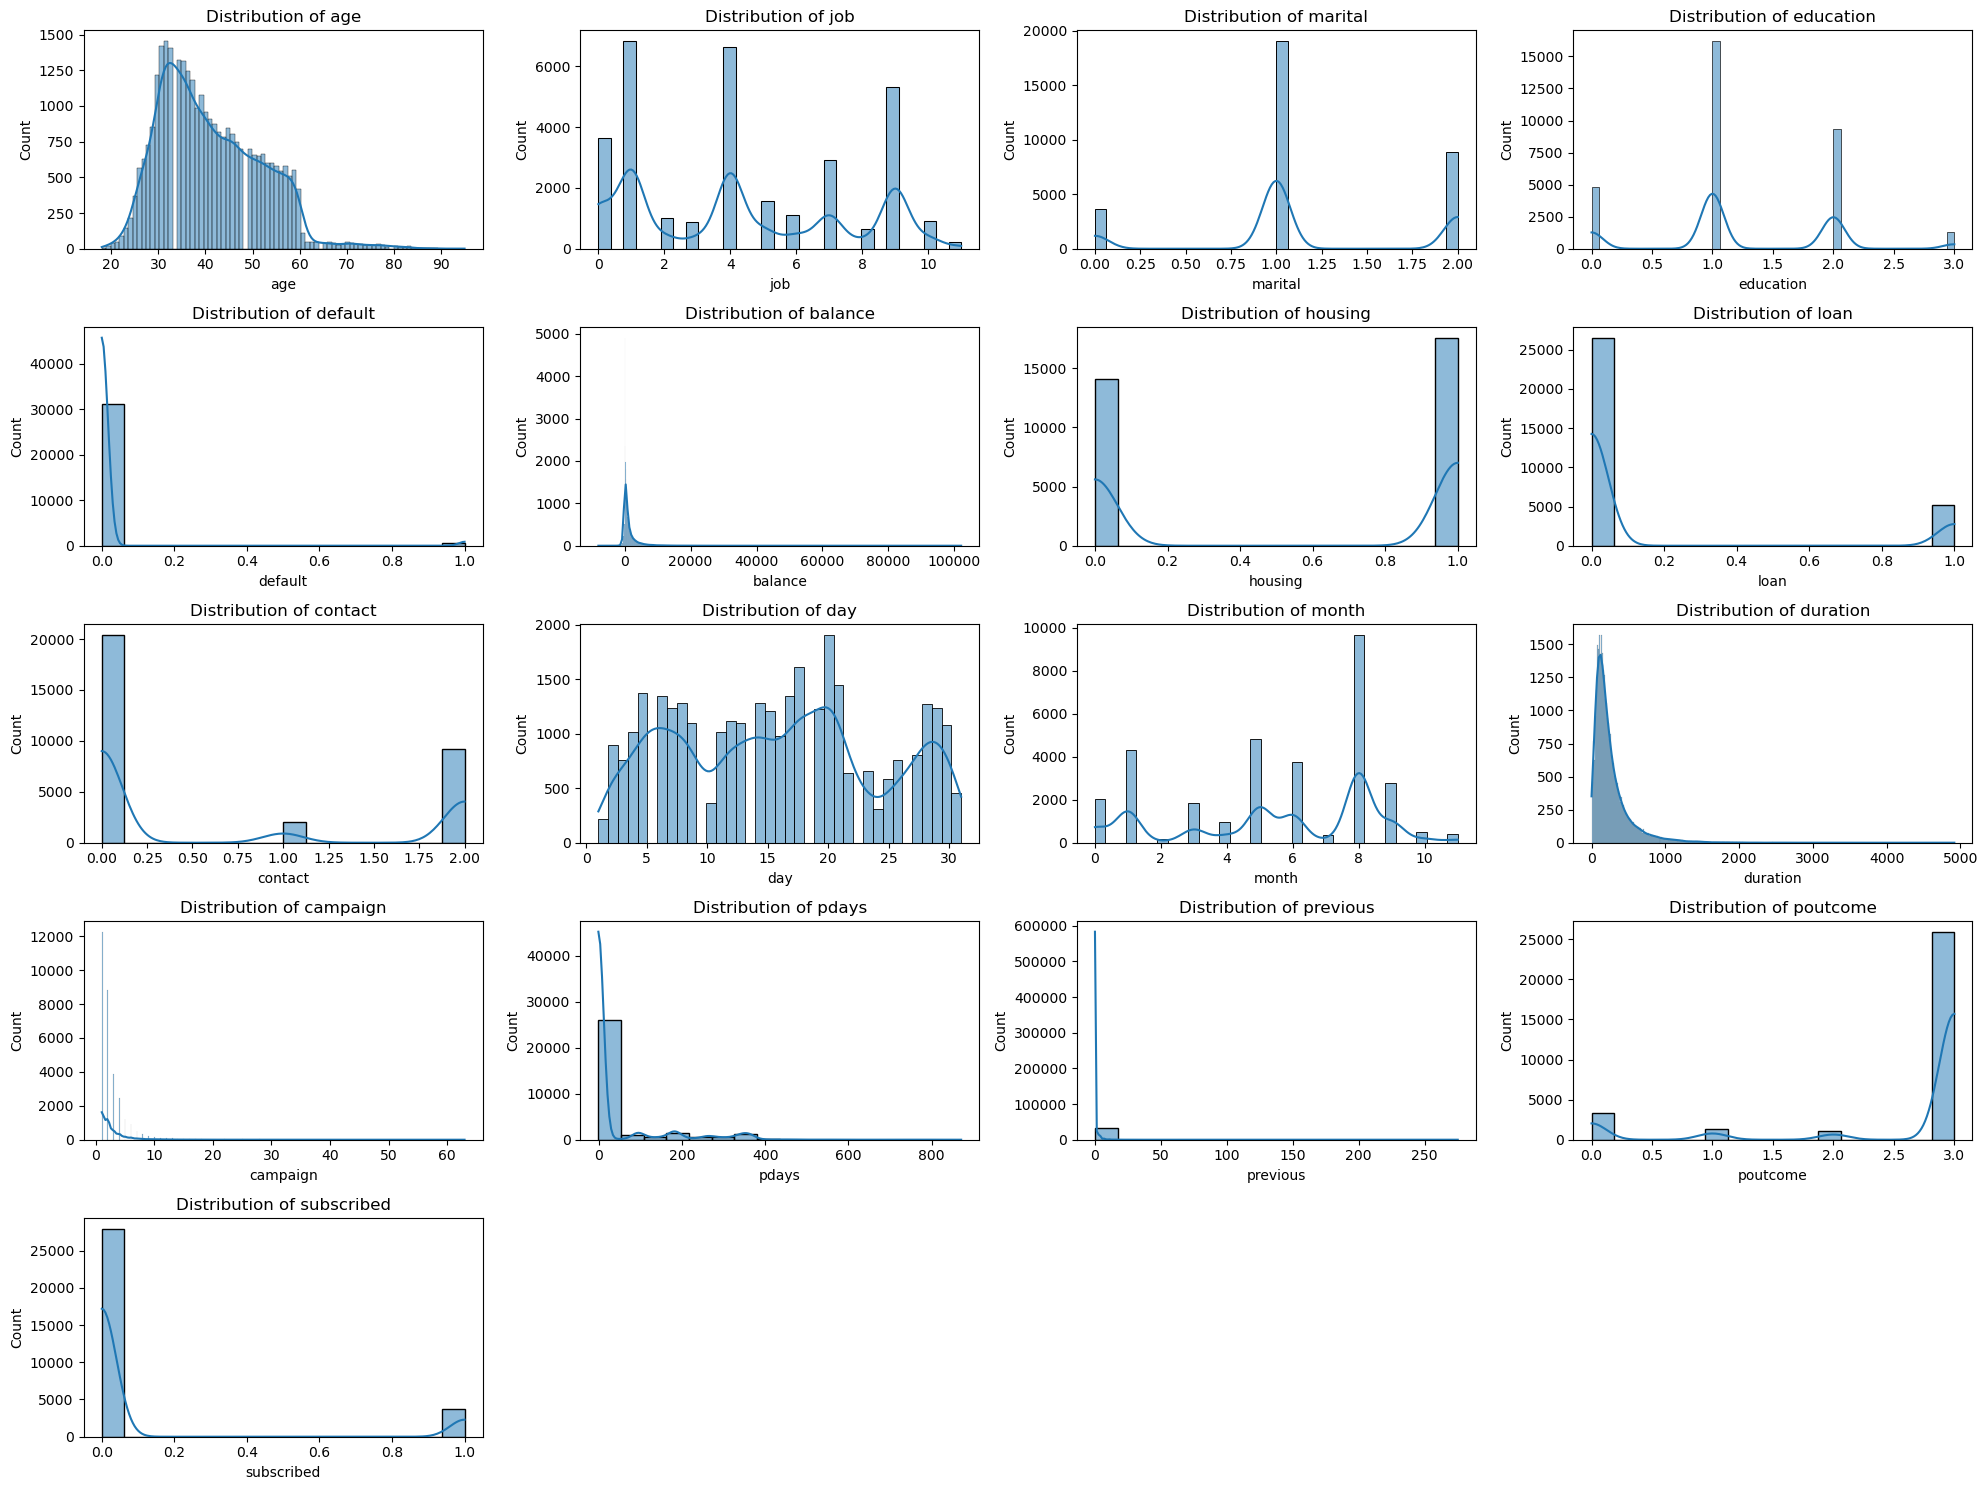

In [284]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns:
    if plotnumber<=20:
        plt.subplot(5, 4, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

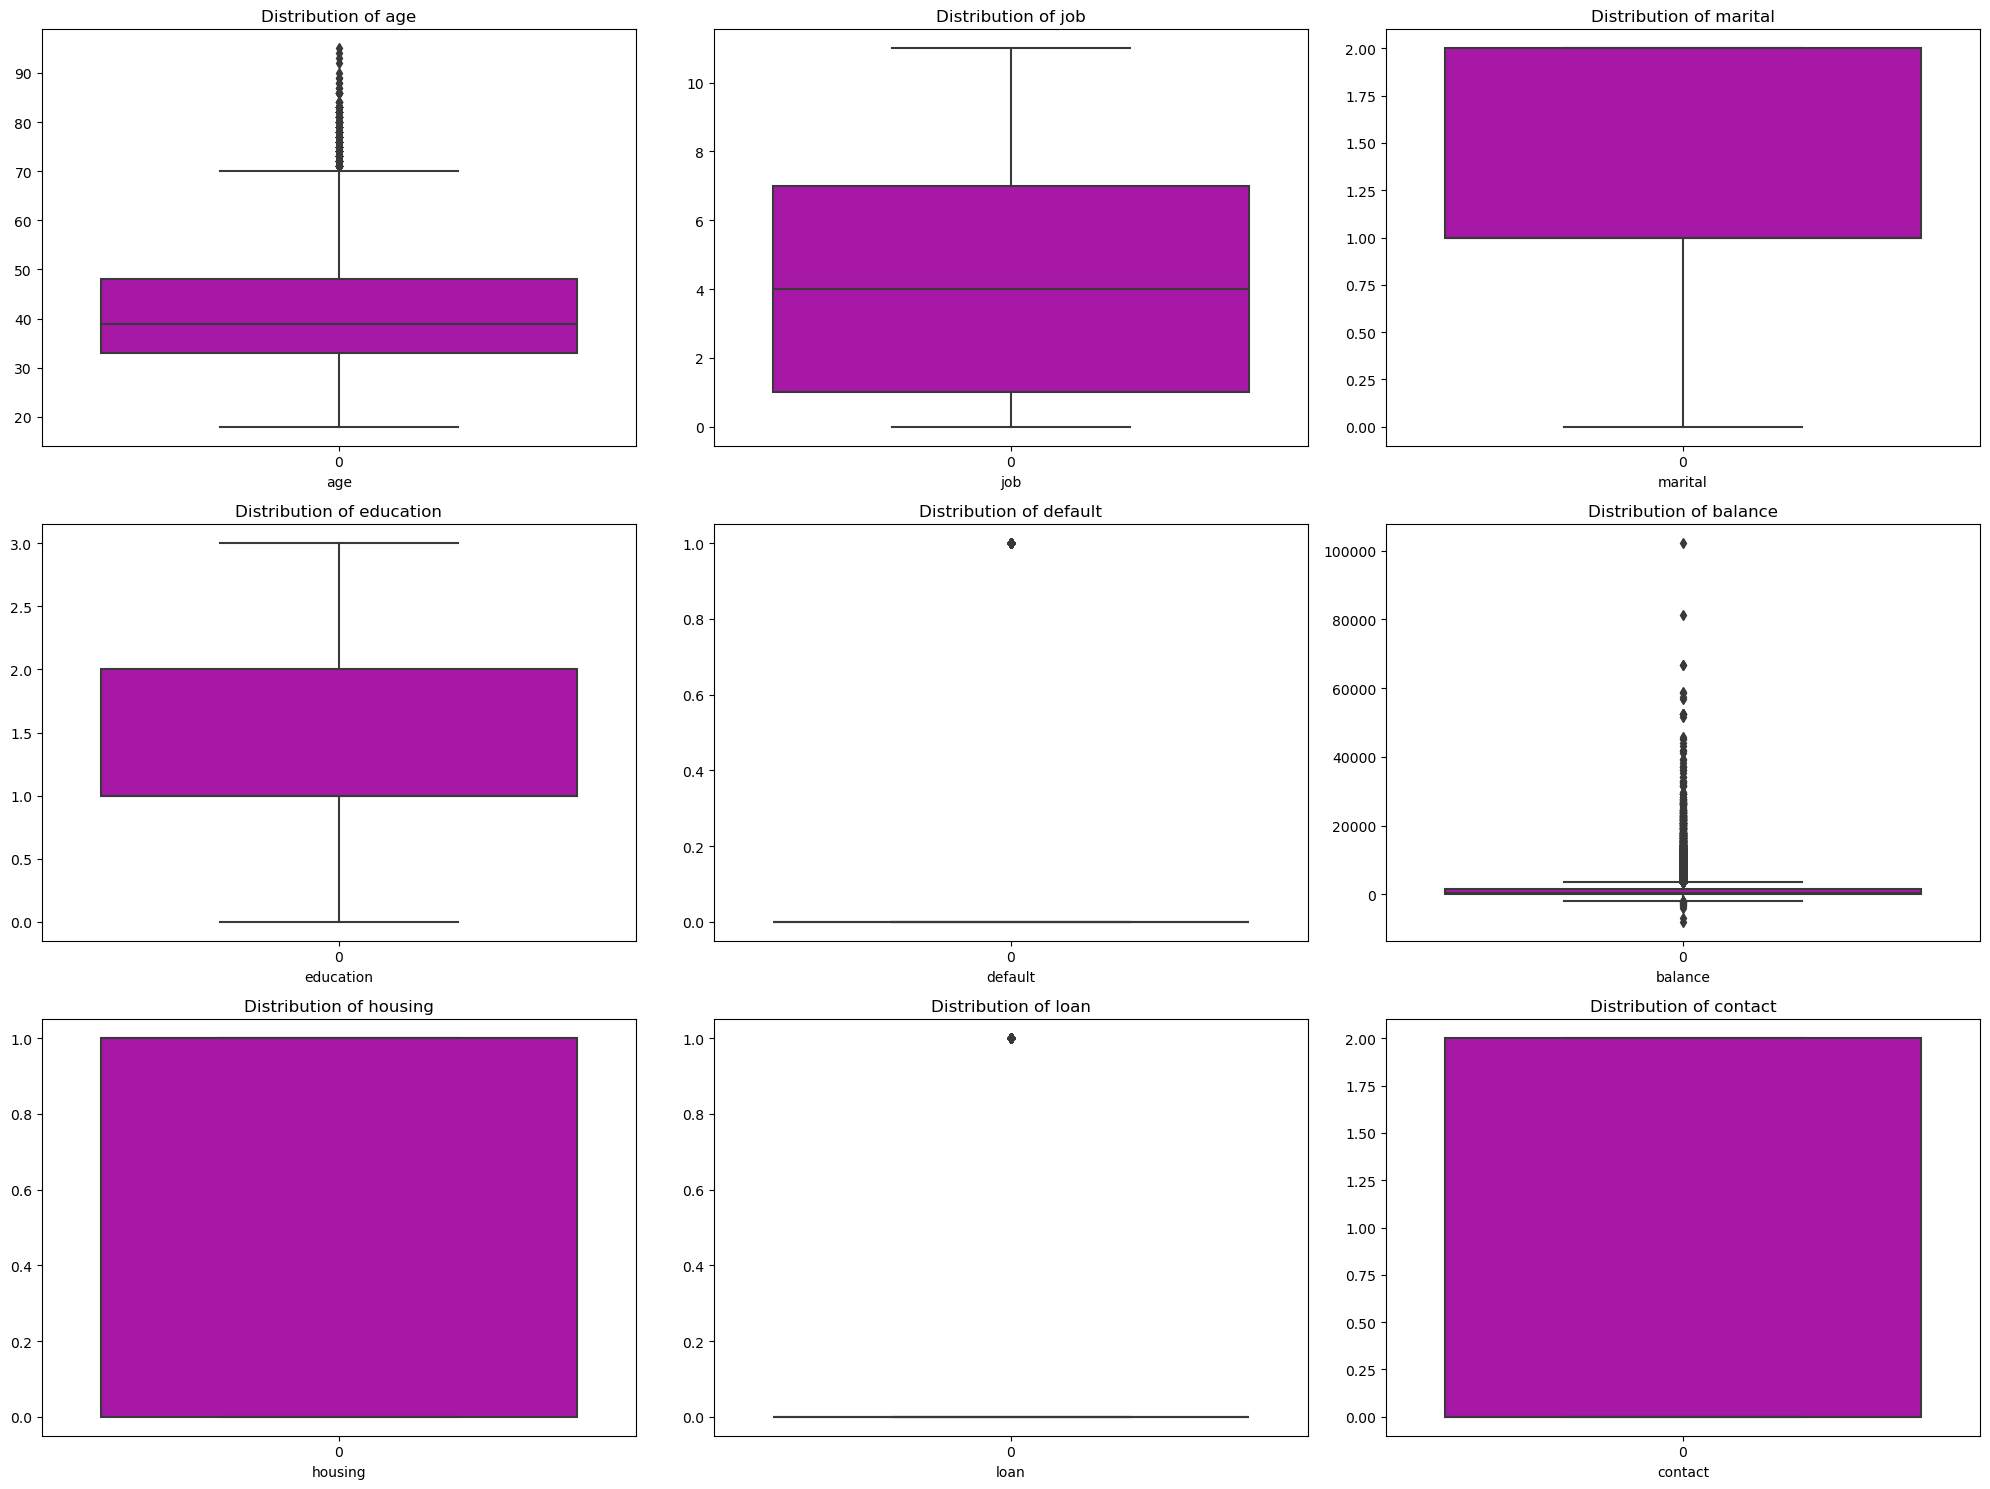

In [285]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[0:9]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

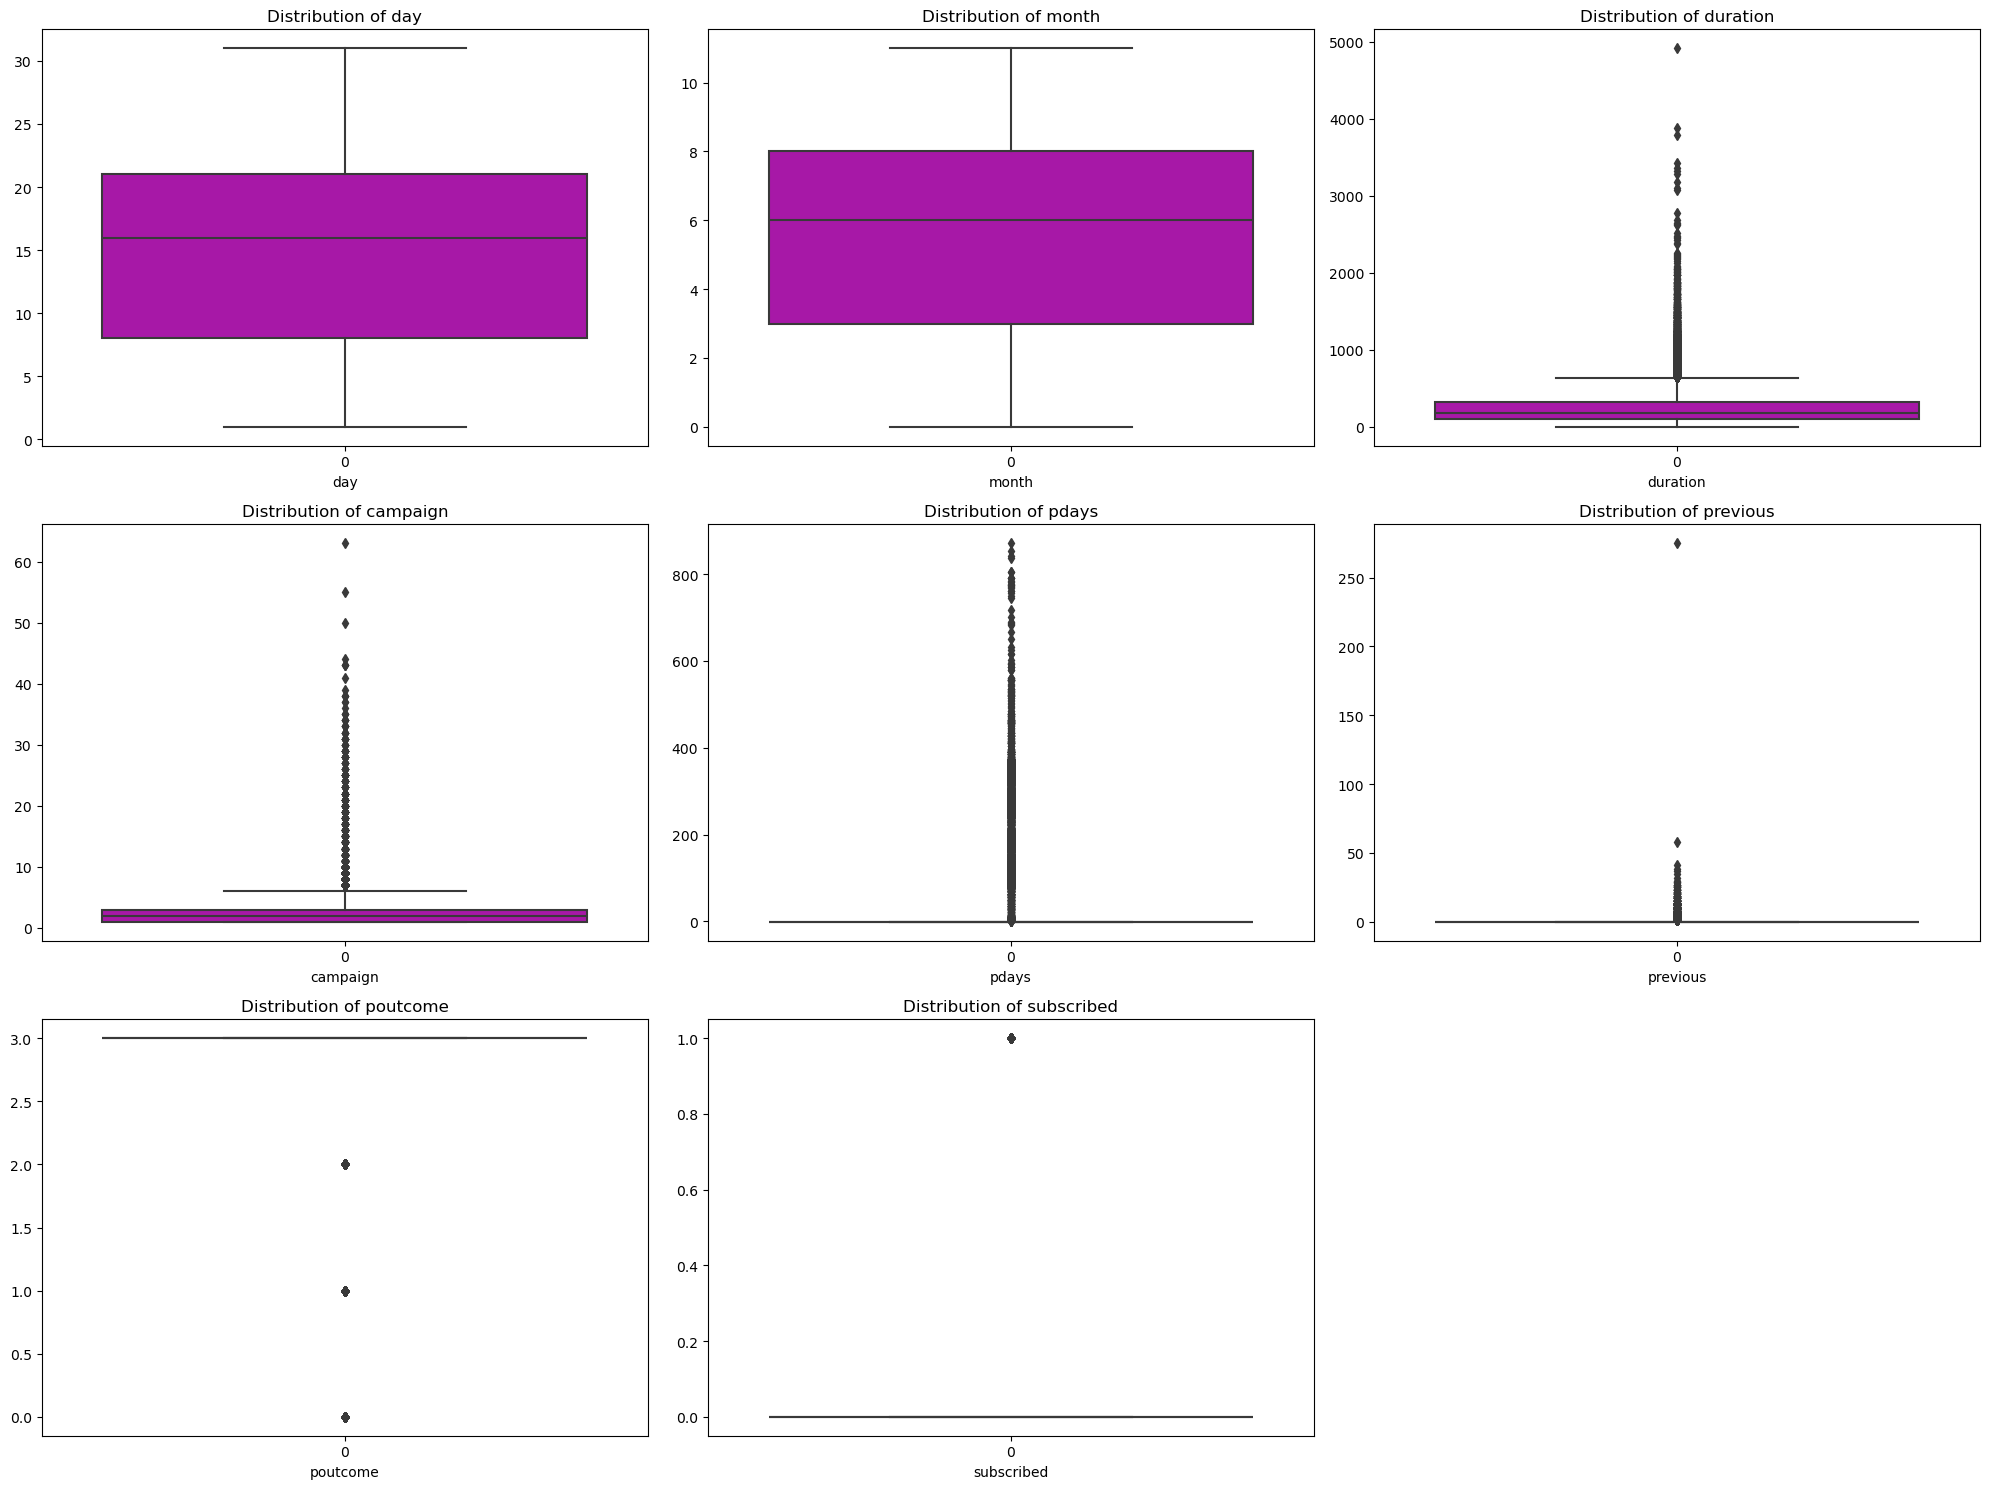

In [286]:
plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[9:18]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [287]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [288]:
df.drop(['housing'],axis=1,inplace=True)
df.drop(['contact'],axis=1,inplace=True)


In [289]:
df.drop(['previous'],axis=1,inplace=True)
df.drop(['pdays'],axis=1,inplace=True)


In [290]:
df.drop(['duration'],axis=1,inplace=True)

In [291]:
df.drop(['default'],axis=1,inplace=True)

In [292]:
df

,age,job,marital,education,balance,loan,day,month,campaign,poutcome,subscribed
0,56,0.0,1.0,3.0,1933,0.0,19,9.0,2,3.0,0.0
1,31,11.0,1.0,1.0,3,0.0,20,5.0,2,3.0,0.0
2,27,7.0,1.0,1.0,891,0.0,18,5.0,1,3.0,0.0
3,57,4.0,0.0,2.0,3287,0.0,22,6.0,1,2.0,1.0
4,31,9.0,1.0,1.0,119,0.0,4,3.0,1,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0,0.0,12,8.0,2,3.0,0.0
31643,53,4.0,0.0,2.0,380,1.0,5,6.0,2,3.0,1.0
31644,32,4.0,2.0,2.0,312,0.0,7,1.0,3,3.0,0.0
31645,57,9.0,1.0,1.0,225,0.0,15,8.0,7,0.0,0.0


In [293]:
from scipy.stats import zscore
#Applying zscore for removing outliers
z=np.abs(zscore(df))
z

,age,job,marital,education,balance,loan,day,month,campaign,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.187933,0.439893,0.379579,1.154007,0.245906,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.449397,0.439893,0.499526,0.177462,0.245906,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.156159,0.439893,0.259631,0.177462,0.567059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.635055,0.439893,0.739422,0.155405,0.567059,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.411091,0.439893,1.419637,0.843197,0.567059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.450388,0.439893,0.460055,0.821140,0.245906,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.324903,2.273280,1.299690,0.155405,0.245906,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.347358,0.439893,1.059794,1.508931,0.075247,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.376088,0.439893,0.100212,0.821140,1.359859,2.613048,0.364694


In [294]:
threshold=3
print(np.where(z>3))

(array([   21,    26,   134, ..., 31594, 31598, 31622]), array([8, 4, 8, ..., 8, 8, 0]))


In [295]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,job,marital,education,balance,loan,day,month,campaign,poutcome,subscribed
0,56,0.0,1.0,3.0,1933,0.0,19,9.0,2,3.0,0.0
1,31,11.0,1.0,1.0,3,0.0,20,5.0,2,3.0,0.0
2,27,7.0,1.0,1.0,891,0.0,18,5.0,1,3.0,0.0
3,57,4.0,0.0,2.0,3287,0.0,22,6.0,1,2.0,1.0
4,31,9.0,1.0,1.0,119,0.0,4,3.0,1,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0,0.0,12,8.0,2,3.0,0.0
31643,53,4.0,0.0,2.0,380,1.0,5,6.0,2,3.0,1.0
31644,32,4.0,2.0,2.0,312,0.0,7,1.0,3,3.0,0.0
31645,57,9.0,1.0,1.0,225,0.0,15,8.0,7,0.0,0.0


In [296]:
# data loss percentage
print("Data Loss Percentage",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data Loss Percentage 4.376402186621164


4% data loss is acceptable.

In [297]:
df_new.skew()

age           0.451151
job           0.268244
marital      -0.106194
education     0.206340
balance       2.437938
loan          1.806508
day           0.102376
month        -0.504631
campaign      2.054650
poutcome     -1.972549
subscribed    2.399637
dtype: float64

In [298]:
#Removing skewness using'cube root ' method

df_new['balance']=np.cbrt(df_new['balance'])

df_new['campaign']=np.cbrt(df_new['campaign'])


In [299]:
df_new.skew()

age           0.451151
job           0.268244
marital      -0.106194
education     0.206340
balance      -0.443023
loan          1.806508
day           0.102376
month        -0.504631
campaign      0.992024
poutcome     -1.972549
subscribed    2.399637
dtype: float64

In [300]:
x=df_new.drop("subscribed",axis=1)
y=df_new["subscribed"]

In [301]:
x


,age,job,marital,education,balance,loan,day,month,campaign,poutcome
0,56,0.0,1.0,3.0,12.456918,0.0,19,9.0,1.259921,3.0
1,31,11.0,1.0,1.0,1.442250,0.0,20,5.0,1.259921,3.0
2,27,7.0,1.0,1.0,9.622603,0.0,18,5.0,1.000000,3.0
3,57,4.0,0.0,2.0,14.868480,0.0,22,6.0,1.000000,2.0
4,31,9.0,1.0,1.0,4.918685,0.0,4,3.0,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.000000,0.0,12,8.0,1.259921,3.0
31643,53,4.0,0.0,2.0,7.243156,1.0,5,6.0,1.259921,3.0
31644,32,4.0,2.0,2.0,6.782423,0.0,7,1.0,1.442250,3.0
31645,57,9.0,1.0,1.0,6.082202,0.0,15,8.0,1.912931,0.0


feature scaling using standard scalerization

In [302]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,balance,loan,day,month,campaign,poutcome
0,1.531201,-1.313446,-0.279848,2.388995,0.858322,-0.444302,0.395651,1.153060,-0.065133,0.444895
1,-0.952185,2.030308,-0.279848,-0.298180,-0.922570,-0.444302,0.516080,-0.182873,-0.065133,0.444895
2,-1.349527,0.814397,-0.279848,-0.298180,0.400060,-0.444302,0.275222,-0.182873,-0.948061,0.444895
3,1.630536,-0.097536,-1.922669,1.045407,1.248232,-0.444302,0.756939,0.151110,-0.948061,-0.566251
4,-0.952185,1.422352,-0.279848,-0.298180,-0.360487,-0.444302,-1.410788,-0.850839,-0.948061,0.444895
...,...,...,...,...,...,...,...,...,...,...
30257,-1.150856,-0.097536,1.362974,1.045407,-1.155758,-0.444302,-0.447354,0.819077,-0.065133,0.444895
30258,1.233195,-0.097536,-1.922669,1.045407,0.015342,2.250721,-1.290358,0.151110,-0.065133,0.444895
30259,-0.852850,-0.097536,1.362974,1.045407,-0.059151,-0.444302,-1.049500,-1.518806,0.554220,0.444895
30260,1.630536,1.422352,-0.279848,-0.298180,-0.172365,-0.444302,-0.086066,0.819077,2.153083,-2.588543


In [303]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.223900,age
1,1.041056,job
2,1.219300,marital
3,1.051897,education
4,1.039302,balance
5,1.023319,loan
6,1.022582,day
7,1.029652,month
8,1.043333,campaign
9,1.017469,poutcome


In [304]:
y.value_counts()

subscribed
0.0    26754
1.0     3508
Name: count, dtype: int64

Oversamping or resampling

In [305]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [306]:
y1.value_counts()

subscribed
0.0    26754
1.0    26754
Name: count, dtype: int64

Now data is balanced, now we can build machine learning classification models

In [307]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [308]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [309]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.631844515043917
[[4820 3161]
 [2749 5323]]
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62      7981
         1.0       0.63      0.66      0.64      8072

    accuracy                           0.63     16053
   macro avg       0.63      0.63      0.63     16053
weighted avg       0.63      0.63      0.63     16053



In [310]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6349591976577587
[[4080 3901]
 [1959 6113]]
              precision    recall  f1-score   support

         0.0       0.68      0.51      0.58      7981
         1.0       0.61      0.76      0.68      8072

    accuracy                           0.63     16053
   macro avg       0.64      0.63      0.63     16053
weighted avg       0.64      0.63      0.63     16053



In [311]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8820781162399551
[[6955 1026]
 [ 867 7205]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      7981
         1.0       0.88      0.89      0.88      8072

    accuracy                           0.88     16053
   macro avg       0.88      0.88      0.88     16053
weighted avg       0.88      0.88      0.88     16053



In [312]:
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8536099171494425
[[6692 1289]
 [1061 7011]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7981
         1.0       0.84      0.87      0.86      8072

    accuracy                           0.85     16053
   macro avg       0.85      0.85      0.85     16053
weighted avg       0.85      0.85      0.85     16053



In [313]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8504952345356008
[[5844 2137]
 [ 263 7809]]
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      7981
         1.0       0.79      0.97      0.87      8072

    accuracy                           0.85     16053
   macro avg       0.87      0.85      0.85     16053
weighted avg       0.87      0.85      0.85     16053



In [314]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7194293901451442
[[5976 2005]
 [2499 5573]]
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73      7981
         1.0       0.74      0.69      0.71      8072

    accuracy                           0.72     16053
   macro avg       0.72      0.72      0.72     16053
weighted avg       0.72      0.72      0.72     16053



In [315]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.934342490500218
[[7591  390]
 [ 664 7408]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      7981
         1.0       0.95      0.92      0.93      8072

    accuracy                           0.93     16053
   macro avg       0.93      0.93      0.93     16053
weighted avg       0.93      0.93      0.93     16053



In [316]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8776552669283
[[7550  431]
 [1533 6539]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      7981
         1.0       0.94      0.81      0.87      8072

    accuracy                           0.88     16053
   macro avg       0.88      0.88      0.88     16053
weighted avg       0.88      0.88      0.88     16053



In [317]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8089453684669532
[[6797 1184]
 [1883 6189]]
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82      7981
         1.0       0.84      0.77      0.80      8072

    accuracy                           0.81     16053
   macro avg       0.81      0.81      0.81     16053
weighted avg       0.81      0.81      0.81     16053



In [318]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.9181461409082414
[[7555  426]
 [ 888 7184]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      7981
         1.0       0.94      0.89      0.92      8072

    accuracy                           0.92     16053
   macro avg       0.92      0.92      0.92     16053
weighted avg       0.92      0.92      0.92     16053



We are getting highest accuracy with Random Forest Classifier(93%). This may be come due to Overfitting so we will check cross validation score.

# Cross Validation Score

In [319]:
from sklearn.model_selection import cross_val_score


In [320]:
scr=cross_val_score(LR,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predLR)-scr.mean())



[0.62446272 0.62455616 0.62502336 0.63545463 0.62554901]
0.6270091759230895
Difference between accuracy score and cross validation score is 0.004835339120827564


In [321]:
scr=cross_val_score(gnb,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predgnb)-scr.mean())



[0.62334143 0.62502336 0.62605121 0.63779086 0.63218391]
0.6288781531446218
Difference between accuracy score and cross validation score is 0.006081044513136846


In [322]:
scr=cross_val_score(dtc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, preddtc)-scr.mean())



[0.75798916 0.90861521 0.90898897 0.91019531 0.91271844]
0.879701418683356
Difference between accuracy score and cross validation score is 0.0023766975565990833


In [323]:
scr=cross_val_score(etc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predetc)-scr.mean())



[0.81807139 0.87721921 0.87572416 0.86543314 0.85926549]
0.8591426779784394
Difference between accuracy score and cross validation score is -0.005532760828996897


In [324]:
scr=cross_val_score(knn,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predknn)-scr.mean())



[0.85544758 0.85853112 0.850869   0.85674236 0.85608822]
0.8555356537203622
Difference between accuracy score and cross validation score is -0.005040419184761391


In [325]:

scr=cross_val_score(rf,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predrf)-scr.mean())



[0.81358625 0.96720239 0.96617455 0.96785347 0.9643024 ]
0.9358238115468751
Difference between accuracy score and cross validation score is -0.0014813210466571025


In [326]:
scr=cross_val_score(gbc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predgbc)-scr.mean())



[0.73070454 0.91870678 0.91104466 0.91533502 0.91122325]
0.8774028510234645
Difference between accuracy score and cross validation score is 0.00025241590483549015


In [327]:
scr=cross_val_score(abc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predabc)-scr.mean())



[0.70743786 0.82517286 0.83143338 0.83309971 0.82450238]
0.8043292394336248
Difference between accuracy score and cross validation score is 0.00461612903332842


In [328]:
scr=cross_val_score(bc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predbc)-scr.mean())



[0.76742665 0.95505513 0.95356008 0.9587889  0.95140641]
0.9172474340367941
Difference between accuracy score and cross validation score is 0.0008987068714473301


In [329]:

scr=cross_val_score(svc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predsvc)-scr.mean())


[0.70472809 0.71893104 0.72257522 0.72497897 0.71582095]
0.7174068547920994
Difference between accuracy score and cross validation score is 0.002022535353044752


The minimum difference between accuracy score and cross validation score is .000252. It is the minimum difference,so the best model is gradient boosting Classifier.

# Hyperparameter Tunning

In [330]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gbc = GradientBoostingClassifier()

GCV = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
GCV.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [331]:
print(GCV.best_params_)
print(GCV.best_score_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
0.9360566012548392


In [335]:
final_model=GradientBoostingClassifier(n_estimators=200,max_depth=5, learning_rate=0.2)
final_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)

In [336]:
import pickle
filename='Banking_Marketing.pkl'
pickle.dump(final_model,open(filename,'wb'))

# By using the test dataset

In [357]:
#Loading the test data
df_test=pd.read_csv('Bank_Marketing_Test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [358]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [359]:
df_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [360]:
df_test.sample(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9596,14603,29,blue-collar,married,secondary,no,162,yes,no,cellular,15,jul,126,3,-1,0,unknown
13187,28715,35,blue-collar,single,secondary,no,505,no,yes,cellular,30,jan,109,3,-1,0,unknown
12649,41503,42,management,married,tertiary,no,1205,no,no,telephone,8,sep,376,2,-1,0,unknown
143,34781,38,technician,single,secondary,no,1019,yes,no,cellular,6,may,249,1,-1,0,unknown
1557,15081,27,housemaid,married,secondary,yes,65,yes,yes,cellular,17,jul,59,1,-1,0,unknown
8143,42072,62,management,married,tertiary,no,7458,no,no,cellular,30,oct,212,2,-1,0,unknown
8982,10806,41,management,married,tertiary,no,1234,no,no,unknown,17,jun,68,1,-1,0,unknown
2519,10212,58,management,married,tertiary,no,313,no,no,unknown,11,jun,204,2,-1,0,unknown
7243,45068,52,management,married,secondary,no,335,no,no,cellular,21,oct,411,1,182,1,failure
9008,18205,43,blue-collar,single,primary,no,2,yes,no,cellular,30,jul,783,3,-1,0,unknown


In [361]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [362]:
df_test.shape

(13564, 17)

In [363]:
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [364]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [365]:
df_test.drop('ID',axis=1,inplace=True)

In [366]:
df_test['default'].value_counts()

default
no     13334
yes      230
Name: count, dtype: int64

In [367]:
from sklearn.preprocessing import LabelEncoder
df_test['job']=LabelEncoder().fit_transform(df_test['job'])
df_test['marital']=LabelEncoder().fit_transform(df_test['marital'])
df_test['education']=LabelEncoder().fit_transform(df_test['education'])
df_test['default']=LabelEncoder().fit_transform(df_test['default'])
df_test['housing']=LabelEncoder().fit_transform(df_test['housing'])
df_test['loan']=LabelEncoder().fit_transform(df_test['loan'])
df_test['contact']=LabelEncoder().fit_transform(df_test['contact'])
df_test['month']=LabelEncoder().fit_transform(df_test['month'])
df_test['poutcome']=LabelEncoder().fit_transform(df_test['poutcome'])

In [368]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>]], dtype=object)

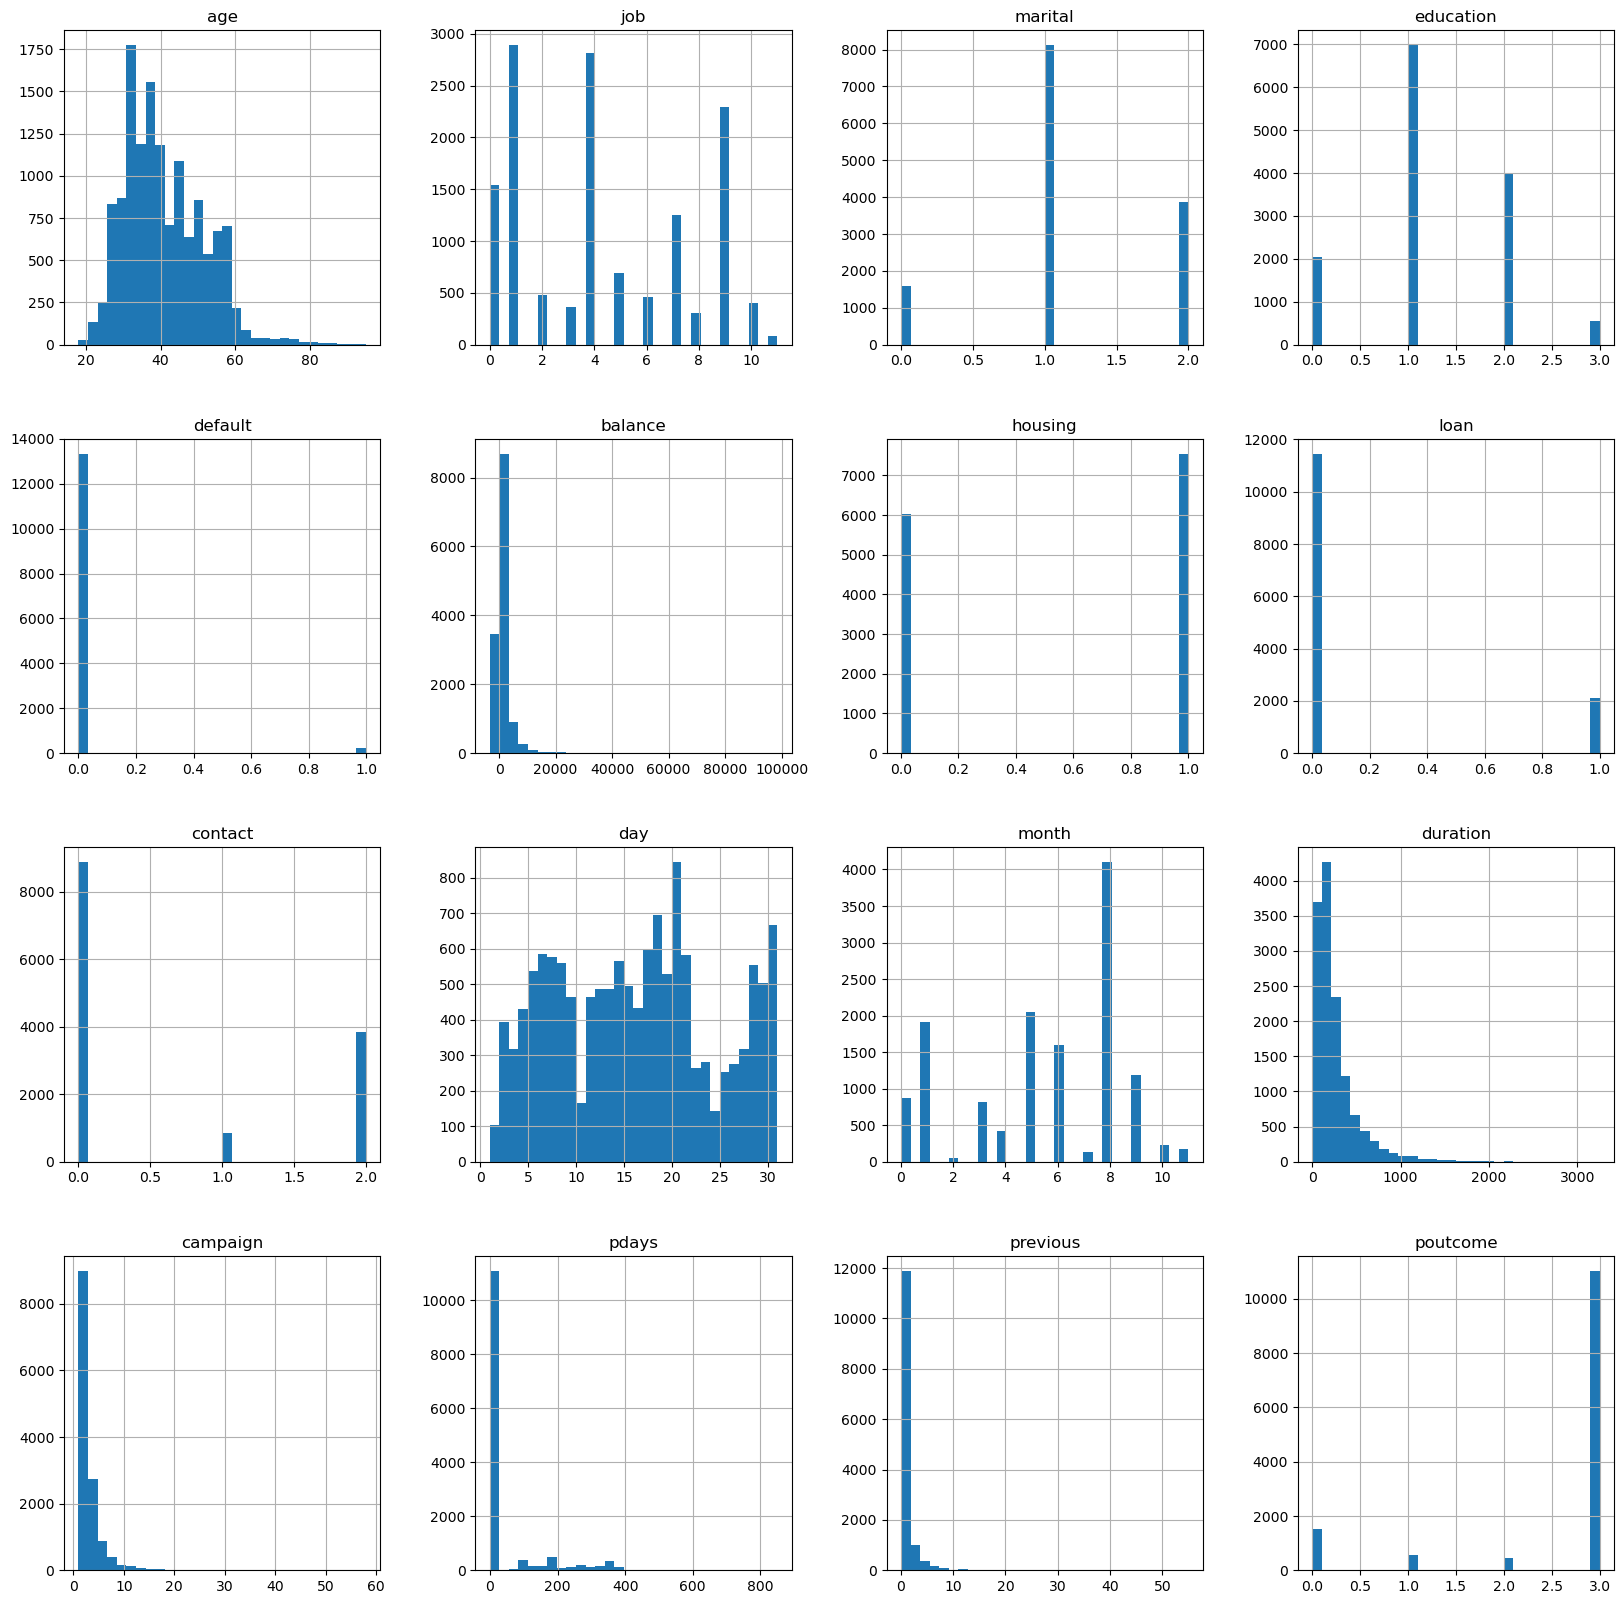

In [369]:
df_test.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [370]:
#Describe the dataset for Statistical summary 
df_test.describe()    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.00000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,4.355721,1.168903,1.224344,0.016957,1358.496535,0.556326,0.15578,0.629976,15.738646,5.499410,258.278679,2.759510,41.648555,0.594441,2.545562
std,10.604108,3.274561,0.610680,0.745224,0.129114,3082.940623,0.496836,0.36266,0.894322,8.288174,3.013095,258.488648,3.060928,101.985178,1.998193,1.005069
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,71.000000,0.000000,0.00000,0.000000,8.000000,3.000000,102.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,445.000000,1.000000,0.00000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1413.250000,1.000000,0.00000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,1.00000,2.000000,31.000000,11.000000,3253.000000,58.000000,850.000000,55.000000,3.000000


In [371]:
df_test.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.085246,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.006456,0.002439,-0.027797,-0.011326,0.009334
job,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.012731,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.009494,0.019584,-0.028884,0.005024,0.020020
marital,-0.396771,0.052579,1.000000,0.110982,-0.000793,-0.000986,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.012563,-0.008048,0.017854,0.021518,-0.010196
education,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.063001,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002513,0.006523,0.003763,0.024317,-0.020194
default,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.060447,0.008097,0.066402,0.018585,0.007931,0.027885,-0.008022,0.012558,-0.030713,-0.025641,0.034386
balance,0.085246,0.012731,-0.000986,0.063001,-0.060447,1.000000,-0.071759,-0.086091,-0.034654,0.006890,0.012272,0.015375,-0.020524,0.007136,0.024824,-0.023993
housing,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.071759,1.000000,0.053394,0.171775,-0.033407,0.271594,0.009843,-0.029587,0.136453,0.045626,-0.116616
loan,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.086091,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.011538,0.011501,-0.028705,-0.016183,0.025735
contact,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.034654,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.030957,0.012308,-0.244138,-0.168726,0.272425
day,-0.004622,0.027381,0.000419,0.033917,0.007931,0.006890,-0.033407,0.003121,-0.030176,1.000000,-0.018811,-0.025344,0.170421,-0.105314,-0.060719,0.096803


In [372]:
df_test.drop(['previous'],axis=1,inplace=True)
df_test.drop(['pdays'],axis=1,inplace=True)

In [373]:
df_test.drop(['housing'],axis=1,inplace=True)
df_test.drop(['contact'],axis=1,inplace=True)

In [374]:
df_test.drop(['duration'],axis=1,inplace=True)
df_test.drop(['default'],axis=1,inplace=True)

In [375]:
df_test

,age,job,marital,education,balance,loan,day,month,campaign,poutcome
0,32,7,1,1,118,0,15,8,6,3
1,78,5,0,0,2787,0,1,5,1,3
2,31,6,2,2,144,0,16,8,1,3
3,57,7,2,0,3777,0,13,8,2,3
4,45,1,0,1,-705,1,3,5,1,3
...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,28,1,4,3
13560,54,1,1,0,2281,0,20,6,1,3
13561,35,5,1,0,285,0,29,4,1,3
13562,29,0,2,1,464,0,9,9,2,2


In [377]:
#Load the model
fitted_model=pickle.load(open("Banking_Marketing.pkl","rb"))

In [378]:
fitted_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)

In [379]:
#Prediction over test data
predictions=fitted_model.predict(df_test)

In [380]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])